In [3]:
#NBA2k Basketball Stats
#Import libraries for functions needed

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#Import the dataset: NBA2k stats
twoKstats = pd.read_csv('nba2k-full.csv')

In [5]:
print(twoKstats)

                 full_name  rating jersey                   team position  \
0             LeBron James      97    #23     Los Angeles Lakers        F   
1            Kawhi Leonard      97     #2   Los Angeles Clippers        F   
2    Giannis Antetokounmpo      96    #34        Milwaukee Bucks      F-G   
3             Kevin Durant      96     #7          Brooklyn Nets        F   
4             James Harden      96    #13        Houston Rockets        G   
..                     ...     ...    ...                    ...      ...   
459             Chris Paul      88     #3  Oklahoma City Thunder        G   
460           Bradley Beal      88     #3     Washington Wizards        G   
461            Rudy Gobert      87    #27              Utah Jazz        C   
462             Kyle Lowry      87     #7        Toronto Raptors        G   
463     Kristaps Porzingis      87     #6       Dallas Mavericks      F-C   

        b_day       height                weight     salary country  \
0   

In [6]:
twoKstats.describe()

,rating,draft_year
count,464.000000,464.000000
mean,77.568966,2013.892241
std,6.933780,3.997465
min,67.000000,2001.000000
25%,73.000000,2011.000000
50%,76.000000,2015.000000
75%,80.000000,2017.000000
max,97.000000,2019.000000


In [7]:
# 1.) What positions make the most money in the NBA?

#First I had to convert the "salary" column from a string to a float by first getting rid of characters that are not numbers.
twoKstats['salary'] = twoKstats['salary'].str.replace('$','').str.replace(',','').astype(float)

#Next I grouped the dataframe by position and calculated the salary mean. 
position_salary = twoKstats.groupby("position")["salary"].mean()

#Then I sorted the position salary values in desending order.
position_salary = position_salary.sort_values(ascending=False)

#Lastly, I print the position salary float that has been sorted in desending order. 
print(position_salary)

#This data suggests that centers make the most money in the NBA.

#To visualize the data I decided to make a bar chart with the position of the player on the x-axis and the salary on the 
#y-axis. 

position
C      1.175769e+07
F-G    1.170986e+07
G      1.073813e+07
C-F    1.071391e+07
F      9.681792e+06
F-C    9.251240e+06
G-F    8.464951e+06
Name: salary, dtype: float64


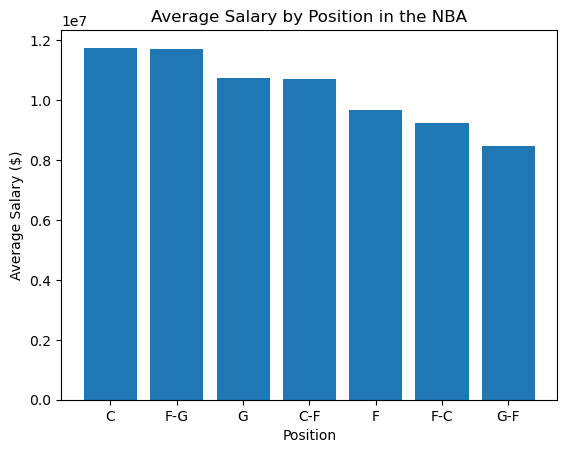

In [8]:
# 1 cont.) To visualize the data I decided to make a bar chart with the position of the player on the x-axis and the salary on 
# the y-axis. 
plt.bar(position_salary.index, position_salary.values)

plt.title('Average Salary by Position in the NBA')
plt.xlabel('Position')
plt.ylabel('Average Salary ($)')

plt.show()
#This cart shows that forwards and guards almost make as much money as centers in the NBA. 

In [9]:
# 2.) Does 2Krating correlate with draft round?

#First I had to rplace "Undrafted" with "0" to ensure the draft_round column was all integers. Then, I converted the column to
#integer format so I could find the correlation coefficient. 
twoKstats['draft_round'] = twoKstats['draft_round'].replace('Undrafted', 0)
twoKstats['draft_round'] = twoKstats['draft_round'].astype(int)
#Next I printed the corellation coefficient 
print(np.corrcoef(twoKstats['rating'], twoKstats['draft_round'])[0,1])

#The correlation coefficient between 2k rating and draft round is 0.0073, this value is positive indicating a positive 
#correlation between 2k rating and draft round, but the value is small, indicating a weak positive correlation. 

0.007309092110717094


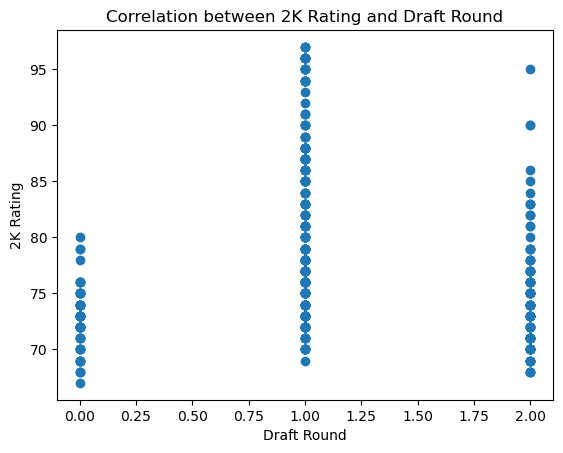

In [10]:
#To visualize the correlation, I decided to make a scatterplot with the draft round on the x-axis and the 2K rating on the
#y-axis. Although it is hard to tell with a line best fit because the data on the x-axis only falls into 3 catigories (undrafted,
#first pick and second pick) it is clear that the players drafted in the first round have a higher 2k rating on average than the 
# undrafted players and the players drafted in the second round.
plt.scatter(twoKstats['draft_round'], twoKstats['rating'])

# Add axis labels and a title
plt.xlabel('Draft Round')
plt.ylabel('2K Rating')
plt.title('Correlation between 2K Rating and Draft Round')

# Show the plot
plt.show()

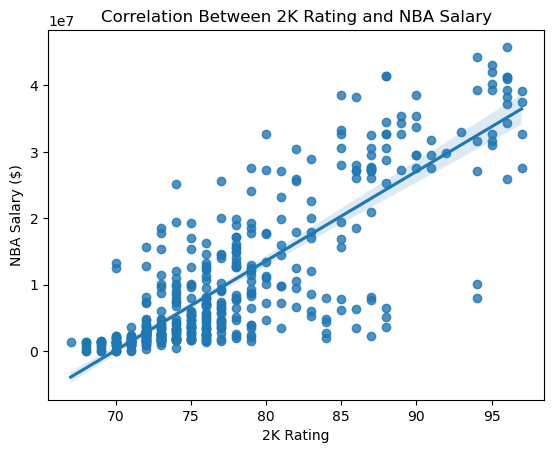

0.8302148089420498


In [11]:
# 3.) Does the NBA2k player ranking correlate with the NBA salary of the player?

#I created a scatter plot with salary on the x axis and 2Krating on the y axis to visualize possible correlation.
sns.regplot(x='rating', y='salary', data=twoKstats)
plt.xlabel('2K Rating')
plt.ylabel('NBA Salary ($)')
plt.title('Correlation Between 2K Rating and NBA Salary')
plt.show()
#I also calculated the correlation coefficient between 2k rating and NBA salary. 
print(np.corrcoef(twoKstats['rating'], twoKstats['salary'])[0,1])
#The correlation coefficient is 0.8320, which indicates a strong positive correlation between 2k rating and NBA salary. 

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 [Text(0, 0, 'Atlanta Hawks'),
  Text(1, 0, 'Boston Celtics'),
  Text(2, 0, 'Brooklyn Nets'),
  Text(3, 0, 'Charlotte Hornets'),
  Text(4, 0, 'Chicago Bulls'),
  Text(5, 0, 'Cleveland Cavaliers'),
  Text(6, 0, 'Dallas Mavericks'),
  Text(7, 0, 'Denver Nuggets'),
  Text(8, 0, 'Detroit Pistons'),
  Text(9, 0, 'Golden State Warriors'),
  Text(10, 0, 'Houston Rockets'),
  Text(11, 0, 'Indiana Pacers'),
  Text(12, 0, 'Los Angeles Clippers'),
  Text(13, 0, 'Los Angeles Lakers'),
  Text(14, 0, 'Memphis Grizzlies'),
  Text(15, 0, 'Miami Heat'),
  Text(16, 0, 'Milwaukee Bucks'),
  Text(17, 0, 'Minnesota Timberwolves'),
  Text(18, 0, 'New Orleans Pelicans'),
  Text(19, 0, 'New York Knicks'),
  Text(20, 0, 'Oklahoma City Thunder'),
  Text(21, 0, 'Orlando Magic'),
  Text(22, 0, 'Philadelphia 76ers'),
  Text(23, 0, 'Phoenix Suns')

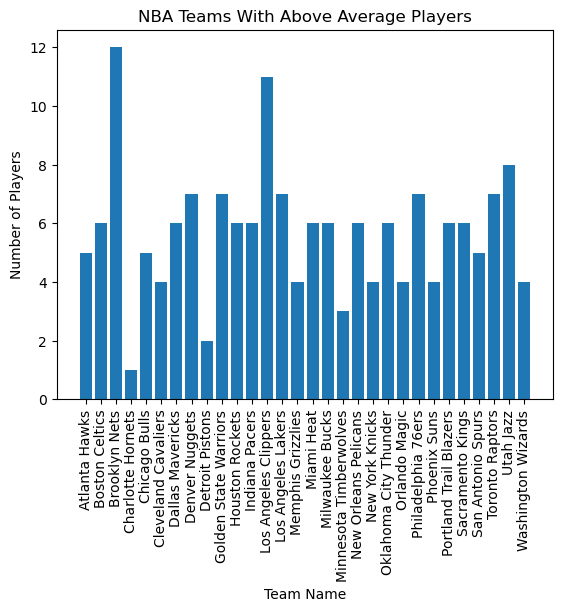

In [12]:
# 4.) What team has the most players with high NBA2k ratings?

#To visualize this data, I will create a bar chart with players with the top 25% 2k ratings and I will sort them by team.

#First, I will find the average 2k rating.
twoKstats['rating'].mean()

#Then I will create a new dataset, only including above 2k average players. 
above_avg = twoKstats[twoKstats['rating'] > 77.56896551724138]

#Then I had to create another dataset using the above_avg dataset that grouped it by team and got the size of each team
team_counts = above_avg.groupby('team').size()

plt.bar(x=team_counts.index, height=team_counts)
plt.title("NBA Teams With Above Average Players")
plt.xlabel("Team Name")
plt.ylabel("Number of Players");

#The graph ended up having a lot of teams on it and it was really crammed so I had to look up how to change the roation of 
#the team names on the x-axis. 
plt.xticks(rotation=90)

#Based on this bar chart I was able to conclude the Brooklyn Nets have the greatest number of above average players on their team.

In [13]:
# 5.) Who is the true best player in NBA2k based on NBA salary and NBA2k ranking?

#First I created a "super rating" column where I multiplied salary by 2k rating
twoKstats['Super_Rating'] = twoKstats['rating'] * twoKstats['salary']
Super_Rating_chart =  twoKstats.loc[:, ['full_name', 'Super_Rating']].sort_values('Super_Rating', ascending=False)
Super_Rating_chart.head(1)

#Based on NBA salary and 2k ranking and salary, Stephen Curry is the best overall player.  

,full_name,Super_Rating
439,Stephen Curry,4.394973e+09
